# 影評資料集(IMDB movie review)情緒分析 

## 載入相關套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense
from tensorflow.keras.optimizers import Adam

## 載入 IMDB 影評資料集

In [2]:
df= pd.read_csv('../IMDB/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
np.unique(df.sentiment)

array(['negative', 'positive'], dtype=object)

## 資料清理(Data Cleaning)

In [4]:
import re
def clean_sentences(line):
    line=line.lower()
    line=re.sub('<.*?>','',line) # removing html tags
    
    #removing contractions
    line=re.sub("isn't",'is not',line)
    line=re.sub("he's",'he is',line)
    line=re.sub("wasn't",'was not',line)
    line=re.sub("there's",'there is',line)
    line=re.sub("couldn't",'could not',line)
    line=re.sub("won't",'will not',line)
    line=re.sub("they're",'they are',line)
    line=re.sub("she's",'she is',line)
    line=re.sub("There's",'there is',line)
    line=re.sub("wouldn't",'would not',line)
    line=re.sub("haven't",'have not',line)
    line=re.sub("That's",'That is',line)
    line=re.sub("you've",'you have',line)
    line=re.sub("He's",'He is',line)
    line=re.sub("what's",'what is',line)
    line=re.sub("weren't",'were not',line)
    line=re.sub("we're",'we are',line)
    line=re.sub("hasn't",'has not',line)
    line=re.sub("you'd",'you would',line)
    line=re.sub("shouldn't",'should not',line)
    line=re.sub("let's",'let us',line)
    line=re.sub("they've",'they have',line)
    line=re.sub("You'll",'You will',line)
    line=re.sub("i'm",'i am',line)
    line=re.sub("we've",'we have',line)
    line=re.sub("it's",'it is',line)
    line=re.sub("don't",'do not',line)
    line=re.sub("that´s",'that is',line)
    line=re.sub("I´m",'I am',line)
    line=re.sub("it’s",'it is',line)
    line=re.sub("she´s",'she is',line)
    line=re.sub("he’s'",'he is',line)
    line=re.sub('I’m','I am',line)
    line=re.sub('I’d','I did',line)
    line=re.sub("he’s'",'he is',line)
    line=re.sub('there’s','there is',line)
    
    #special characters and emojis
    line=re.sub('\x91The','The',line)
    line=re.sub('\x97','',line)
    line=re.sub('\x84The','The',line)
    line=re.sub('\uf0b7','',line)
    line=re.sub('¡¨','',line)
    line=re.sub('\x95','',line)
    line=re.sub('\x8ei\x9eek','',line)
    line=re.sub('\xad','',line)
    line=re.sub('\x84bubble','bubble',line)
    
    # remove concated words
    line=re.sub('trivialBoring','trivial Boring',line)
    line=re.sub('Justforkix','Just for kix',line)
    line=re.sub('Nightbeast','Night beast',line)
    line=re.sub('DEATHTRAP','Death Trap',line)
    line=re.sub('CitizenX','Citizen X',line)
    line=re.sub('10Rated','10 Rated',line)
    line=re.sub('_The','_ The',line)
    line=re.sub('1Sound','1 Sound',line)
    line=re.sub('blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah','blah blah',line)
    line=re.sub('ResidentHazard','Resident Hazard',line)
    line=re.sub('iameracing','i am racing',line)
    line=re.sub('BLACKSNAKE','Black Snake',line)
    line=re.sub('DEATHSTALKER','Death Stalker',line)
    line=re.sub('_is_','is',line)
    line=re.sub('10Fans','10 Fans',line)
    line=re.sub('Yellowcoat','Yellow coat',line)
    line=re.sub('Spiderbabe','Spider babe',line)
    line=re.sub('Frightworld','Fright world',line)
    
    #removing punctuations    
    punctuations = ',@#!~?+&*[]-%._-:/£();$=><|{}^' + '''"“´”'`'''
    for p in punctuations:
        line = line.replace(p, ' ')
        
    return line

In [5]:
from sklearn.preprocessing import LabelEncoder

df['review'] = df['review'].apply(lambda x: clean_sentences(x))
le=LabelEncoder()
df['sentiment']= le.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,petter mattei s love in the time of money is...,1


## EDA

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 586.1+ KB


### Missing value checking

In [80]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### 筆數統計

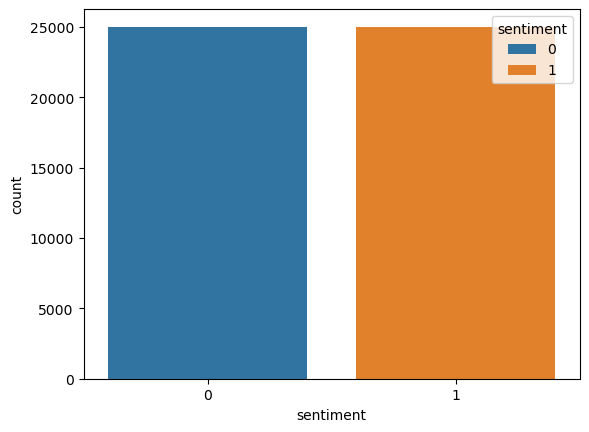

In [81]:
sns.countplot(x=df['sentiment'], hue=df['sentiment']);

### 文字雲(Word Cloud)

In [6]:
sentences=df['review']
pos=' '.join(map(str,sentences[df['sentiment']==1]))
neg=' '.join(map(str,sentences[df['sentiment']==0]))

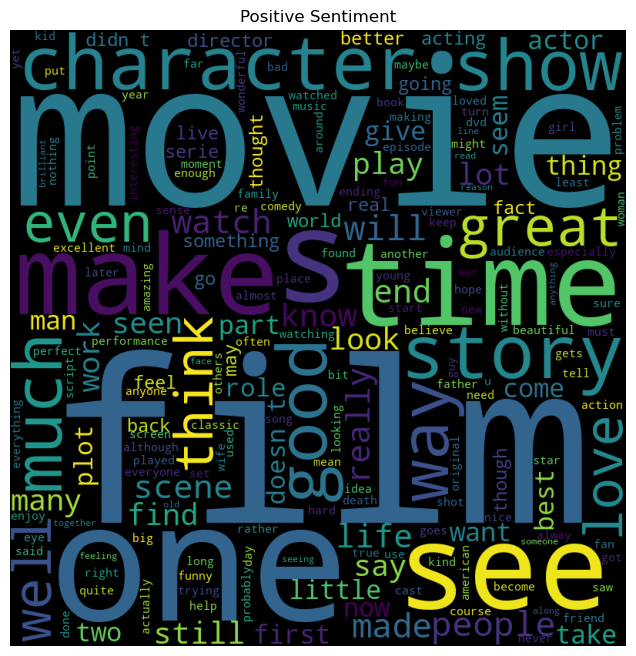

In [7]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')
plt.show() 

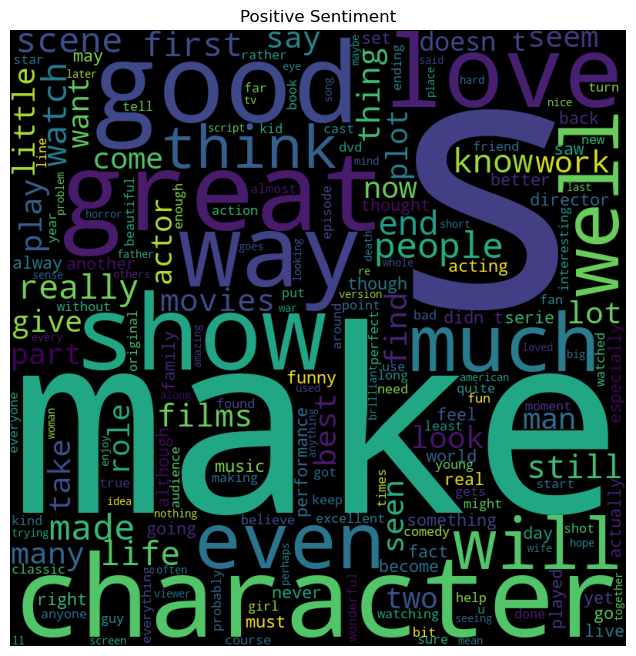

In [8]:
extra_stopwords = ['film', 'movie', 'story', 'br', 'one', 'see', 'time']
stopwords = set(list(stopwords) + extra_stopwords)
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')
plt.show() 

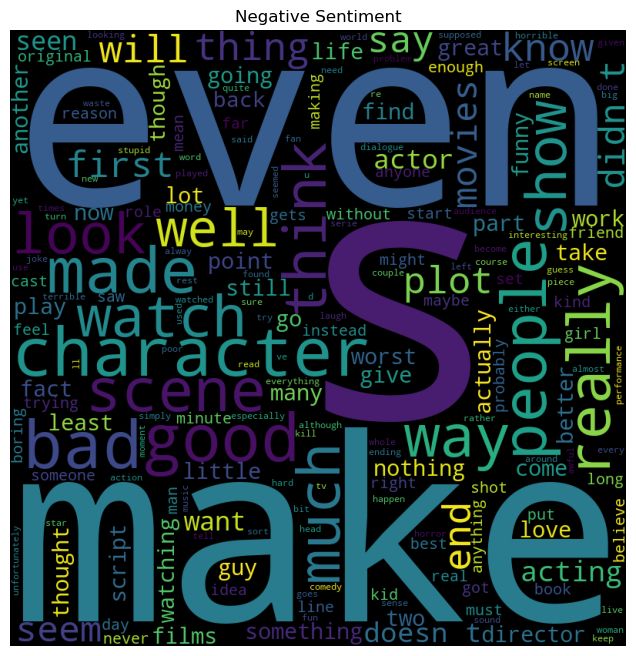

In [9]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(neg) 

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')
plt.show() 

In [16]:
pd.set_option('display.max_colwidth', None)
neg_data = df[df['sentiment']==0]
neg_data.query('review.str.contains("good")')['review'][:10]

12    so im not a big fan of boll s work but then again not many are  i enjoyed his movie postal  maybe im the only one   boll apparently bought the rights to use far cry long ago even before the game itself was even finsished  people who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned  that this is not far cry    this is something mr boll have schemed together along with his legion of schmucks   feeling loneley on the set mr boll invites three of his countrymen to play with  these players go by the names of til schweiger  udo kier and ralf moeller three names that actually have made them selfs pretty big in the movie biz  so the tale goes like this  jack carver played by til schweiger  yes carver is german all hail the bratwurst eating dudes    however i find that tils acting in this movie is pretty badass   people have complained about how he is not really staying true to the whole carver agenda but we only saw carver in 

In [17]:
# 取得字詞與索引的對照表字典
imdb_vocabulary = {}
num_distinct_words = 20000   # 字典
X = []
index = 1
for i in df['review'].values:
    line = []
    for j in i.split(' '):
        if j in imdb_vocabulary:                
            line.append(imdb_vocabulary[j])
        else:
            if index >= num_distinct_words:
                break
            imdb_vocabulary[j] = index
            line.append(index)
            index += 1
    X.append(line)
    
max_sequence_length = 200   # 句子最大字數
# 長度不足時補 0
X = pad_sequences(X, maxlen=max_sequence_length, value = 0.0) 

In [84]:
print(np.max(X))

19999


In [85]:
X.shape

(50000, 200)

In [86]:
X[999]

array([  171,    50,  3286,   636,     2,     3,   420,  3581,    52,
        9255,    19,    19,    38,  6326,   518,    50,    46,    34,
          67,    19,    19,    95,   540, 12716,   442,   376,  2893,
       18016,    29,    95,   944,  2497,   264,    19,    19,   842,
       12921, 16275,  1278,    45,  2850,  5472,    61,  2266,  5624,
         780,    44,    50,  1284,     2,    50,  3051,    19,   146,
         411,    49,  1278,   317,    86,    44,     3,  6028,  1071,
         189,    19,    19,     3,  7539, 15757,  2819,   207,  9405,
         297,   412,   411,    49,   429,   438, 18017,    19,    19,
         722,    29,  3373,   411,    49,  4829,   559,     3,   466,
          20,    21,  2422,   297,   173,  2582,    25,    58,  3468,
          22,    44,  2377,     2,   394,    19,   384,    19,    20,
          11,   919,  2422,   171,     3,   279,    19,    19,     3,
         711,   644,    15,    21,    19,     3,  6430,   187,  1022,
           2,  1320,

## 資料分割

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,df['sentiment'].values,test_size=0.2)

## 訓練模型

In [19]:
# 參數設定
Batch_size = 1280            # 批量
embedding_output_dims = 15  # 嵌入層輸出維度
Epochs = 15        # 訓練執行週期

# 建立模型
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

# 指定優化器、損失函數
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train, y_train, batch_size=Batch_size, 
            epochs=Epochs, validation_split=.2)

# 模型評估
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Loss: {loss}, Accuracy: {100*accuracy:.2f}%')

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.5258 - loss: 0.6921 - val_accuracy: 0.5675 - val_loss: 0.6880
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.5865 - loss: 0.6848 - val_accuracy: 0.6068 - val_loss: 0.6731
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.6451 - loss: 0.6551 - val_accuracy: 0.6445 - val_loss: 0.6305
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6909 - loss: 0.6001 - val_accuracy: 0.6852 - val_loss: 0.5779
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.7280 - loss: 0.5423 - val_accuracy: 0.7020 - val_loss: 0.5612
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.7563 - loss: 0.5149 - val_accuracy: 0.7122 - val_loss: 0.5452
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.7712 - loss: 0.4859 - val_accuracy: 0.7236 - val_loss: 0.5410
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.7869 - loss: 0.4664 - val_accuracy: 0.

## 模型評估

In [90]:
def plot_graph(history,string):
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show()

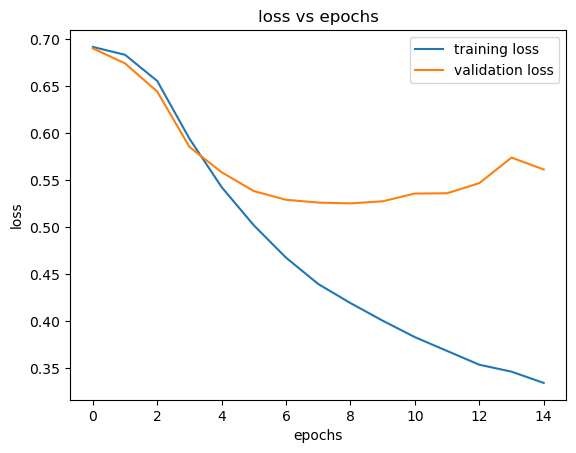

In [91]:
plot_graph(history,'loss')

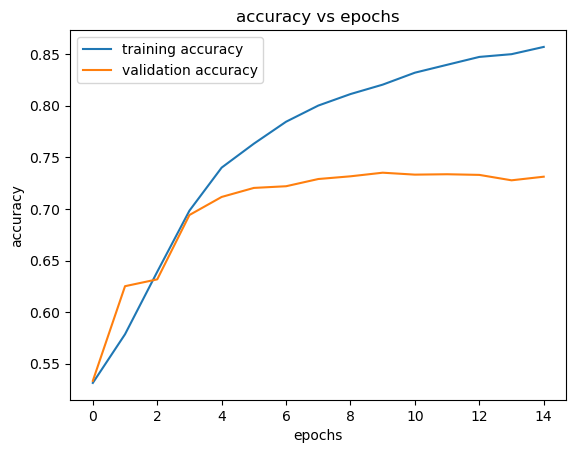

In [92]:
plot_graph(history,'accuracy')

In [ ]:
model.save('imdb_model.keras')

In [104]:
print(list(y_test[:10]))
list(np.around(model.predict(X_test[:10], verbose=False)).reshape(-1).astype(int))

[0, 1, 1, 0, 0, 1, 1, 0, 0, 1]


[0, 1, 0, 0, 1, 1, 0, 0, 0, 1]

## 自訂資料預測

In [20]:
# 將文字轉換為索引值
test_data = ['the movie was cool. The animation and the graphics '+
               'were out of this world. I would recommend this movie.'
            , 'the movie is great', 'the movie is bad']
text_index = []
for i, line in enumerate(test_data):
    line_index = []
    for j, word in enumerate(line.split(' ')):
        if word in imdb_vocabulary:
            line_index.append(imdb_vocabulary[word])
    text_index.append(line_index)

X = pad_sequences(text_index, maxlen=max_sequence_length, value = 0.0) 
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[0.6103126 ],
       [0.6798373 ],
       [0.22403859]], dtype=float32)

In [21]:
list(np.around(model.predict(X, verbose=False)).reshape(-1).astype(int))

[1, 1, 0]